# Workflow Schema API

Prior to the workflow schema API it was a challenge to be able to programatically know what inputs a given workflow takes and what type of data a workflow will return. The Workflow Schema API aims to solve this problem by providng a list of inputs, outputs, typing hints, and schemas of kinds.


## Setup

First let's define a few variable for use in our api request. the workspace name and workflow ID can be found and configured on a workflow by clicking the workspace pencil icon.





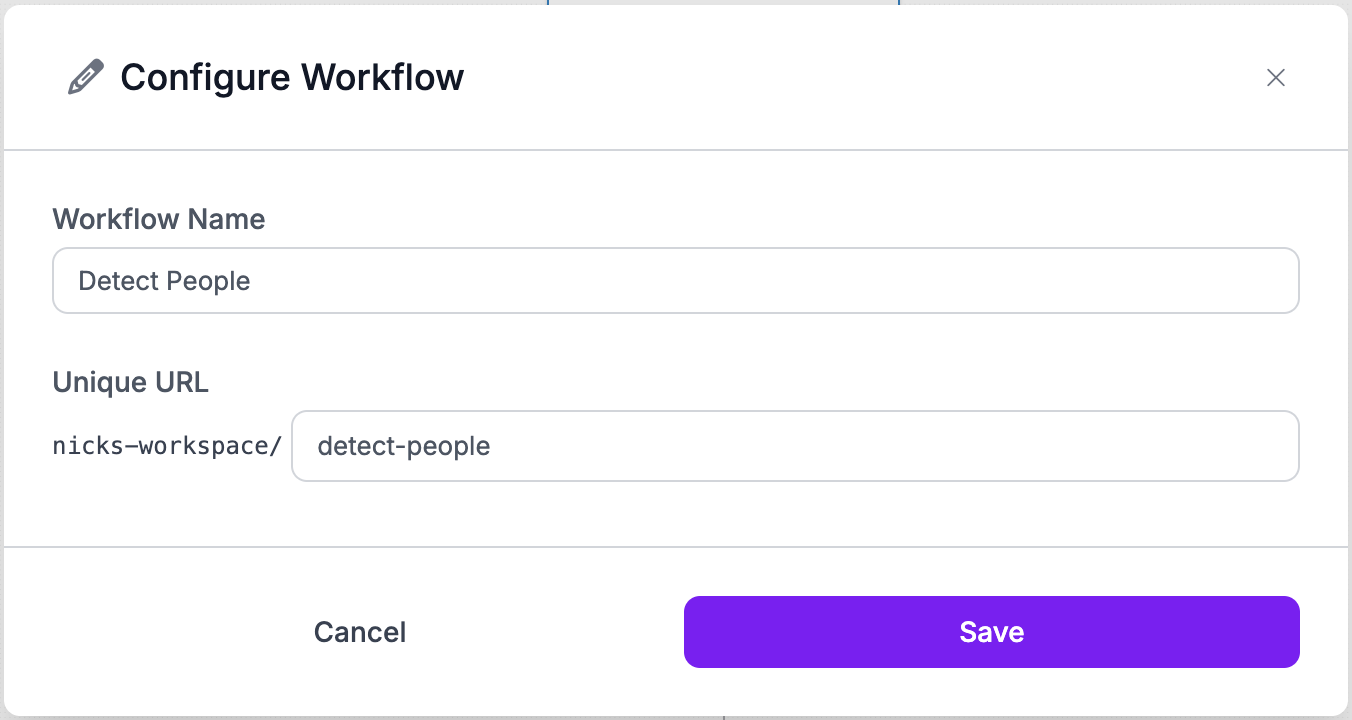

You can also point this request to a self hosted, or dedicated deployment inference server url. Make sure to configure your ROBOFLOW_API_KEY in Google Colab secrets if you'd like to run this notebook aswell.


In [ ]:
from google.colab import userdata


WORKSPACE_NAME = "nicks-workspace"
WORKFLOW_ID= "detect-people"
INFERENCE_SERVER_URL = "https://detect.roboflow.com"

WORKFLOW_SCHEMA_ENDPOINT = f"{INFERENCE_SERVER_URL}/{WORKSPACE_NAME}/workflows/{WORKFLOW_ID}/describe_interface"
ROBOFLOW_API_KEY = userdata.get("ROBOFLOW_API_KEY")

## Workflow Configuration

For this example, let's show a simple workflow that takes one parameter for the model id, and runs the input image on a object detection model. It then outputs the predictions from the model.

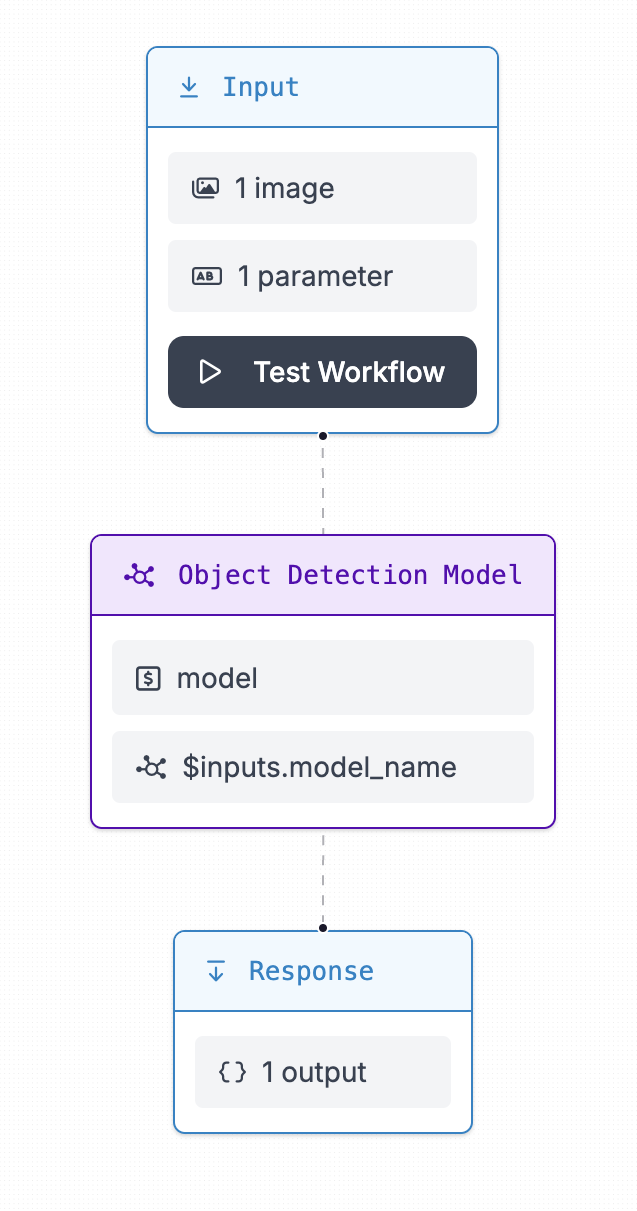

## API Request

Now that we've got our workflow built, Let's take a look at the code required to hit the API.

In [ ]:
import requests

headers = {
    "Content-Type": "application/json",
}

data = {
    "api_key": ROBOFLOW_API_KEY,
}

res = requests.post(WORKFLOW_SCHEMA_ENDPOINT, headers=headers, json=data)

schema = res.json()

inputs = schema["inputs"]
outputs = schema["outputs"]
kinds_schemas = schema["kinds_schemas"]
typing_hints = schema["typing_hints"]


## Inputs and Outputs

The inputs and outputs keys show all of the inputs/outputs the workflow expects to run and return. This workflow requires an image and a model_name and will return a "model_predictions".

In [ ]:
from pprint import pprint
pprint(inputs)
pprint(outputs)

{'image': ['image'], 'model_name': ['roboflow_model_id']}
{'model_predictions': ['object_detection_prediction']}


## Typing Hints
The typing_hints key show the type of data being returned from the request from a python data type perspective.


In [ ]:
pprint(typing_hints)

{'image': 'dict',
 'object_detection_prediction': 'dict',
 'roboflow_model_id': 'str'}


## Kinds Schemas
The kinds_schemas keys return an Open API specification with more detailed information about the data type being returned and how to parse it. For example the 'object_detection_prediction' contains information about the nested data that will be present.

In [ ]:
pprint(kinds_schemas)

{'image': {'properties': {'type': {'const': 'url',
                                   'enum': ['url'],
                                   'title': 'Type',
                                   'type': 'string'},
                          'value': {'description': 'Value depends on `type` - '
                                                   'for url, one should '
                                                   'provide URL to the file, '
                                                   'for `file` - local path, '
                                                   'for `base64` - base64 '
                                                   'string.',
                                    'title': 'Value'}},
           'required': ['type', 'value'],
           'title': 'ImageSchema',
           'type': 'object'},
 'object_detection_prediction': {'$defs': {'BoundingBoxSchema': {'properties': {'class': {'description': 'Name '
                                                                 